In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
raw_df = pd.read_csv('data/005930.KS.csv')
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000,6110,5660,6110,4591.915527,74195000,NaN,NaN
1,2000-01-05,5800,6060,5520,5580,4193.600586,74680000,NaN,NaN
2,2000-01-06,5750,5780,5580,5620,4223.660156,54390000,NaN,NaN
3,2000-01-07,5560,5670,5360,5540,4163.535645,40305000,4336.392090,NaN
4,2000-01-10,5600,5770,5580,5770,4336.392090,46880000,4193.598796,NaN


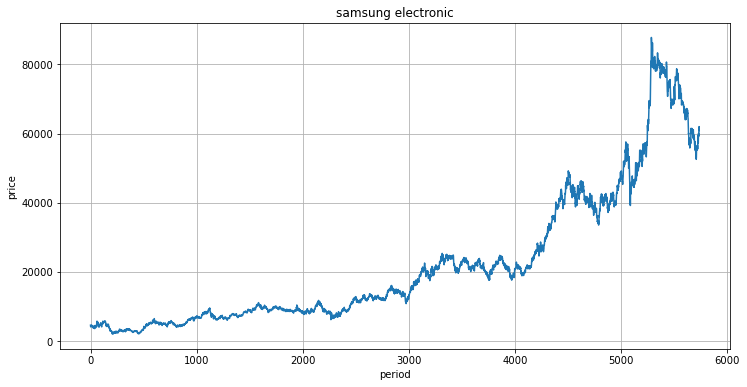

In [3]:
plt.figure(figsize=(12, 6))
plt.title('samsung electronic')
plt.xlabel('period')
plt.ylabel('price')
plt.grid()
plt.plot(raw_df['Adj Close'], label='Adj Close')
plt.show()

In [4]:
# 통계정보 확인
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5.737000e+03,5734.000000,5732.000000
mean,25579.056998,25836.580094,25317.380164,25574.404741,22206.308708,2.163846e+07,22195.727342,22192.139078
std,20488.705307,20658.432729,20313.394177,20474.815859,19999.029964,1.533788e+07,19986.893381,19980.399929
min,2540.000000,2760.000000,2420.000000,2730.000000,2051.707031,0.000000e+00,2096.799398,2111.830078
25%,10280.000000,10420.000000,10140.000000,10320.000000,7816.028320,1.179825e+07,7822.342611,7818.375171
50%,17240.000000,17460.000000,17020.000000,17200.000000,13620.248050,1.760500e+07,13616.384115,13595.703320
75%,36260.000000,36440.000000,36020.000000,36180.000000,30765.562500,2.681515e+07,30656.198890,30670.543460
max,90300.000000,96800.000000,89500.000000,91000.000000,87764.804690,1.642150e+08,87218.276040,86761.767190


In [5]:
# null값 확인
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          3
5MA          5
dtype: int64

In [6]:
# 최소값이 0인 column 확인
for col in raw_df.columns:
    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

Volume <class 'str'>


In [7]:
raw_df.loc[raw_df['Volume'] == 0]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
23,2000-02-04,5130,5130,5130,5130,3855.405762,0,3933.065023,4073.352881
41,2000-03-01,5120,5120,5120,5120,3847.891113,0,3767.726644,3795.282910
66,2000-04-05,6800,6800,6800,6800,5110.478516,0,5160.582194,5307.383008
72,2000-04-13,6910,6910,6910,6910,5193.148926,0,5338.446778,5289.345801
84,2000-05-01,6000,6000,6000,6000,4509.247070,0,4258.733236,4274.766504
...,...,...,...,...,...,...,...,...,...
5564,2022-02-28,71900,71900,71900,71900,70610.359380,0,71265.070310,71945.967190
5567,2022-03-04,72900,72900,72900,72900,71592.437500,0,70872.250000,70688.929690
5570,2022-03-10,69500,69500,69500,69500,68253.414060,0,69562.835940,70138.979690
5573,2022-03-15,70200,70200,70200,70200,68940.859380,0,68646.239580,68606.957810


In [8]:
# 각 column의 0 갯수 확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col] == 0].shape[0]
    print(col, ':', str(missing_rows))

Date : 0
Open : 0
High : 0
Low : 0
Close : 0
Adj Close : 0
Volume : 127
3MA : 0
5MA : 0


In [9]:
# Volume의 0값을 NaN으로 모두 대체
raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)

# 각 column의 0 갯수 재확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col] == 0].shape[0]
    print(col, ':', str(missing_rows))

Date : 0
Open : 0
High : 0
Low : 0
Close : 0
Adj Close : 0
Volume : 0
3MA : 0
5MA : 0


In [10]:
# null값 재확인
raw_df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
3MA            3
5MA            5
dtype: int64

In [11]:
# null값 포함된 column 찾기
raw_df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume        True
3MA           True
5MA           True
dtype: bool

In [12]:
# null값(NaN) 모두 제거하기
raw_df = raw_df.dropna()

In [13]:
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [14]:
# 정규화(0 ~ 1 사이 값으로 변환)
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close',
              'Adj Close', 'Volume', '3MA', '5MA']

scaled_df = scalar.fit_transform(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
print(scaled_df)

          Open      High       Low     Close  Adj Close    Volume       3MA  \
0     0.037375  0.035517  0.038470  0.034440   0.026655  0.363715  0.025192   
1     0.034982  0.031689  0.036518  0.033873   0.026217  0.177799  0.025634   
2     0.034868  0.031689  0.036059  0.033760   0.026129  0.250704  0.026163   
3     0.036235  0.033177  0.037437  0.035120   0.027181  0.300555  0.025987   
4     0.039426  0.036368  0.040193  0.038178   0.029548  0.386615  0.026163   
...        ...       ...       ...       ...        ...       ...       ...   
5600  0.644485  0.603360  0.642857  0.642007   0.669073  0.075634  0.675543   
5601  0.651322  0.611867  0.654341  0.651071   0.678406  0.075582  0.673193   
5602  0.660438  0.628881  0.666973  0.669197   0.697073  0.111131  0.675543   
5603  0.677530  0.632071  0.676160  0.671463   0.699406  0.085378  0.685724   
5604  0.670693  0.624628  0.669270  0.659001   0.686573  0.054940  0.695906   

           5MA  
0     0.025871  
1     0.025267  


In [15]:
def make_sequence_dataset(feature, label, window_size):
    feature_list = []
    label_list = []

    for i in range(len(feature) - window_size):
        feature_list.append(feature[i: i + window_size])
        label_list.append(label[i + window_size])

    return np.array(feature_list), np.array(label_list)

In [16]:
feature_cols = ['3MA', '5MA', 'Adj Close']
label_cols = ['Adj Close']

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [17]:
feature_df.head()

,3MA,5MA,Adj Close
0,0.025192,0.025871,0.026655
1,0.025634,0.025267,0.026217
2,0.026163,0.025516,0.026129
3,0.025987,0.025676,0.027181
4,0.026163,0.026191,0.029548


In [18]:
label_df.head()

,Adj Close
0,0.026655
1,0.026217
2,0.026129
3,0.027181
4,0.029548


In [19]:
# dataframe을 numpy로 변환
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(5605, 3) (5605, 1)


In [20]:
# 학습 데이터 생성
window_size = 40

X, Y = make_sequence_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(5565, 40, 3) (5565, 1)


In [21]:
split_ratio = 0.95
split = int(split_ratio * len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(5286, 40, 3) (5286, 1) (279, 40, 3) (279, 1)


In [22]:
model = Sequential()
model.add(LSTM(units=128, activation='tanh',
               input_shape=x_train[0].shape))
                            # x_train[0].shape = (40, 3)
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=300, batch_size=16, callbacks=[early_stop])

Epoch 1/300
331/331 [==============================] - 6s 13ms/step - loss: 7.9037e-04 - mae: 0.0110 - val_loss: 4.4774e-04 - val_mae: 0.0168
Epoch 2/300
331/331 [==============================] - 4s 12ms/step - loss: 1.4882e-04 - mae: 0.0075 - val_loss: 3.5999e-04 - val_mae: 0.0147
Epoch 3/300
331/331 [==============================] - 4s 12ms/step - loss: 1.2135e-04 - mae: 0.0070 - val_loss: 3.0879e-04 - val_mae: 0.0137
Epoch 4/300
331/331 [==============================] - 4s 12ms/step - loss: 1.2584e-04 - mae: 0.0070 - val_loss: 2.9367e-04 - val_mae: 0.0134
Epoch 5/300
331/331 [==============================] - 4s 12ms/step - loss: 9.4301e-05 - mae: 0.0061 - val_loss: 2.9443e-04 - val_mae: 0.0137
Epoch 6/300
331/331 [==============================] - 4s 12ms/step - loss: 9.0028e-05 - mae: 0.0061 - val_loss: 4.1362e-04 - val_mae: 0.0165
Epoch 7/300
331/331 [==============================] - 4s 12ms/step - loss: 7.9807e-05 - mae: 0.0057 - val_loss: 2.5125e-04 - val_mae: 0.0125
Epoch 

9/9 [==============================] - 0s 6ms/step


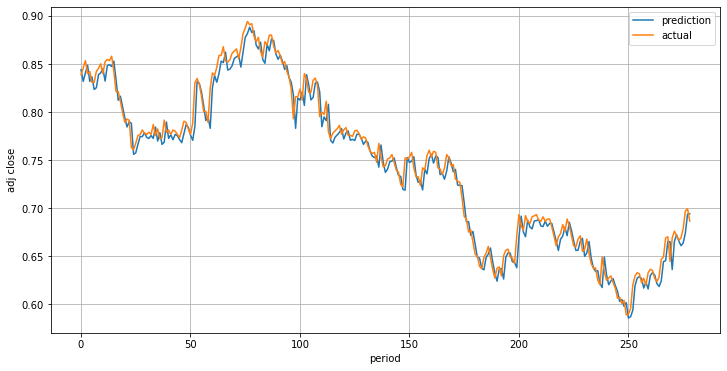

In [24]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.xlabel('period')
plt.ylabel('adj close')
plt.plot(pred, label='prediction')
plt.plot(y_test, label='actual')
plt.grid()
plt.legend(loc='best')
plt.show()

# test_data 5%(최근날짜)로 그린 그래프 = 최신일 변동 추이 예상

In [25]:
# 평균 절대값 백분율 오차 계산(MAPE)
print(np.sum(abs(y_test-pred)/y_test)/len(x_test))

0.011879836748399226
